# Eligiendo un backend

Un backend representa el sistema sobre el que vamos a ejecutar nuestro programa cuántico, puede ser un simulador o un computador real. En este notebook vamos a consultar los backends disponibles en IBM Quantum y seleccionar uno de ellos para ejecutar nuestros programas. 

In [1]:
from qiskit_ibm_provider import IBMProvider #importamos la clase IBMProvider

#Especifica que vas a usar los recursos de IBMQ
provider=IBMProvider()

# Consulta los backends disponibles
provider.backends()

[<IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

También podemos filtrar los backends por sus características. En el siguiente ejemplo buscamos un backend que pueda ejecutar al menos 5 qubits, que sea un computador real (no un simulador) y que esté actualmente operativo:

In [2]:
#Filtro los backends que cumplan unas determinadas características
provider.backends(min_num_qubits=9, simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>]

Para seleccionar un backend concreto basta con utilizar provider.get_backend():

In [5]:
backend=provider.get_backend('ibm_brisbane')
print(backend)

<IBMBackend('ibm_brisbane')>


También podemos seleccionar el que esté menos ocupado (el que tenga menos trabajos en cola) utilizando el método "least_busy":

In [6]:
from qiskit_ibm_provider import least_busy

devices = provider.backends(min_num_qubits=5, simulator=False, operational=True)
#Encuentro el backend menos ocupado
backend = least_busy(devices)
print(backend)

<IBMBackend('ibm_kyoto')>


Podemos conseguir las características del backend usando los atributos y métodos del objeto backend:

In [11]:
print('provider=',backend.provider)
print('name=',backend.name)
print('num_qubits=',backend.num_qubits)
print('coupling map=',backend.coupling_map)
print('max_shots=',backend.max_shots)
print('basis gate=', backend.basis_gates)  
print('QVolumen=',backend.configuration().quantum_volume)
print('processor type=',backend.configuration().processor_type)
print("constraints",backend.configuration().timing_constraints)
if backend.status().operational==1 :
    print('is operational')
else :
    print('is not operational')
print('pending_jobs=',backend.status().pending_jobs)
print("t1(0)=",backend.properties().t1(0))
print("t2(0)=",backend.properties().t2(0))
print('readout error(0)=',backend.properties().readout_error(0))

provider= <IBMProvider>
name= ibm_kyoto
num_qubits= 127
coupling map= [[0, 14], [1, 0], [1, 2], [3, 2], [4, 3], [4, 5], [6, 5], [7, 6], [8, 7], [8, 9], [8, 16], [9, 10], [11, 10], [11, 12], [12, 13], [15, 4], [16, 26], [17, 12], [17, 30], [18, 14], [18, 19], [19, 20], [21, 20], [22, 15], [22, 21], [22, 23], [23, 24], [25, 24], [25, 26], [27, 26], [27, 28], [28, 29], [28, 35], [30, 29], [30, 31], [31, 32], [32, 36], [33, 20], [33, 39], [34, 24], [34, 43], [37, 38], [38, 39], [39, 40], [40, 41], [42, 41], [43, 42], [44, 43], [44, 45], [46, 45], [47, 35], [47, 46], [48, 47], [49, 48], [49, 55], [50, 49], [50, 51], [51, 36], [52, 37], [53, 41], [53, 60], [54, 45], [54, 64], [55, 68], [56, 52], [57, 56], [57, 58], [59, 58], [59, 60], [61, 60], [62, 61], [62, 63], [63, 64], [64, 65], [65, 66], [67, 66], [67, 68], [68, 69], [70, 69], [71, 58], [72, 62], [73, 66], [73, 85], [74, 70], [75, 90], [76, 75], [76, 77], [77, 71], [77, 78], [79, 78], [79, 91], [80, 79], [81, 72], [81, 80], [82, 81], [

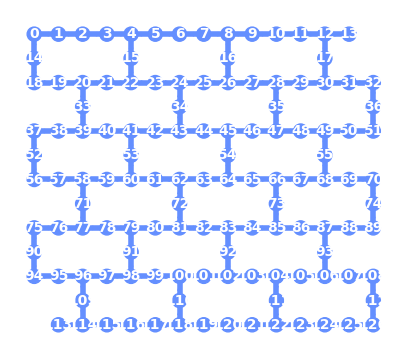

In [12]:
from qiskit.visualization import plot_gate_map

plot_gate_map(backend,plot_directed=True)

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table